### 1. 高斯噪声

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [3]:
def gaussian_noise(image, mean=0, sigma=0.1, percentage = 0.8, seed=42):
    noise_img = image.copy()
    noise_num = int(percentage * image.shape[0] * image.shape[1])
    random.seed(seed)
    for _ in range(noise_num):
        # choose a random pixel
        x = random.randint(0, image.shape[0] - 1) # row
        y = random.randint(0, image.shape[1] - 1)
        # add noise
        noise_img[x, y] = noise_img[x, y] + random.gauss(mean, sigma)

        if noise_img[x, y] < 0:
            noise_img[x, y] = 0
        elif noise_img[x, y] > 255:
            noise_img[x, y] = 255

    return noise_img
    

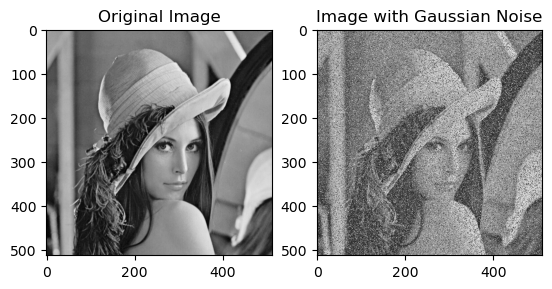

In [4]:
# load image
img = cv2.imread('../lenna.png', 0) # 0: gray, 1: color
img_noise = gaussian_noise(img, mean=2, sigma=50, percentage=0.8, seed=42)
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(img_noise, cmap='gray')

### 2. 椒盐噪声

In [5]:
def salt_pepper_noise(image, percentage=0.8, seed=42):
    img_noise = image.copy()
    noise_num = int(percentage * image.shape[0] * image.shape[1])
    random.seed(seed)
    for _ in range(noise_num):
        # choose a random pixel
        x = random.randint(0, image.shape[0]-1)
        y = random.randint(0, image.shape[1]-1)
        # add noise
        if random.random() < 0.5:
            img_noise[x, y] = 0
        else:
            img_noise[x, y] = 255
    
    return img_noise

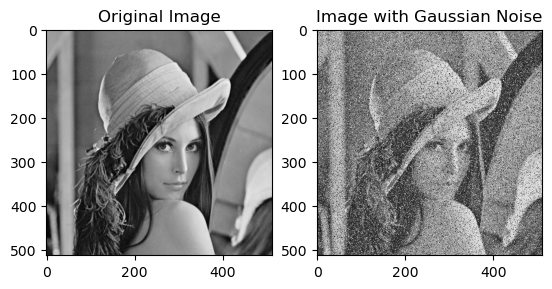

In [6]:
# load image
img = cv2.imread('../lenna.png', 0) # 0: gray, 1: color
img_noise = salt_pepper_noise(img, percentage=0.2, seed=42)
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(img_noise, cmap='gray')

### 3. PCA降维

##### (1) data standardization
$$X_{norm} = \frac{X-\mu}{\sigma}$$

##### (2) covariance matrix
$$\Sigma = \frac{1}{n-1}X_{norm}^TX_{norm}$$

##### (3) eigenvalues and eigenvectors
$$\Sigma v = \lambda v$$

##### (4) select the top k eigenvectors
$$X_{pca} = X_{norm}V_k$$

In [8]:
class CPCA():
    def __init__(self, X, k):
        '''
        X: (n, m) matrix
        k: number of components
        '''
        self.X = X
        self.k = k
        self.normX = [] # normalized X
        self.C = [] # covariance matrix
        self.U = [] # transposed X
        self.Z = [] # final pca matrix

        self.normX = self._normalize()
        self.C = self._covariance_matrix()
        self.U = self._eigen_decomposition()
        self.Z = self._pca()
    
    def _normalize(self):
        normX = []
        mean = np.array([np.mean(attr) for attr in self.X.T])
        normX = self.X - mean
        print('normX: \n', normX)
        return normX
    
    def _covariance_matrix(self):
        ns = np.shape(self.normX)[0]
        C = np.dot(self.normX.T, self.normX) / (ns - 1)
        print('covariance martrix: \n', C)
        return C
    
    def _eigen_decomposition(self):
        # a: eigenvalues, b: eigenvectors
        a, b = np.linalg.eig(self.C)
        print('eigenvalues: \n', a)
        print('eigenvectors: \n', b)
        # sort eigenvalues in descending order
        ind = np.argsort(-a)
        # sort eigenvectors according to eigenvalues
        UT = [b[:, ind[i]] for i in range(self.k)]
        U = np.array(UT).T
        print('U: \n', U)
        return U
    
    def _pca(self):
        Z = np.dot(self.normX, self.U)
        print('Z:\n', Z)
        return Z
    
if __name__ == '__main__':
    X = np.array([[10, 15, 29],
                [15, 46, 13],
                [23, 21, 30],
                [11, 9,  35],
                [42, 45, 11],
                [9,  48, 5],
                [11, 21, 14],
                [8,  5,  15],
                [11, 12, 21],
                [21, 20, 25]])

    k = np.shape(X)[1] - 1
    cpca = CPCA(X, k)

normX: 
 [[ -6.1  -9.2   9.2]
 [ -1.1  21.8  -6.8]
 [  6.9  -3.2  10.2]
 [ -5.1 -15.2  15.2]
 [ 25.9  20.8  -8.8]
 [ -7.1  23.8 -14.8]
 [ -5.1  -3.2  -5.8]
 [ -8.1 -19.2  -4.8]
 [ -5.1 -12.2   1.2]
 [  4.9  -4.2   5.2]]
covariance martrix: 
 [[ 108.32222222   74.53333333  -10.08888889]
 [  74.53333333  260.62222222 -106.4       ]
 [ -10.08888889 -106.4          94.17777778]]
eigenvalues: 
 [335.15738485  95.32771231  32.63712506]
eigenvectors: 
 [[-0.30253213 -0.87499307 -0.37797014]
 [-0.86718533  0.08811216  0.49012839]
 [ 0.39555518 -0.47604975  0.78543792]]
U: 
 [[-0.30253213 -0.87499307]
 [-0.86718533  0.08811216]
 [ 0.39555518 -0.47604975]]
Z:
 [[ 13.46265879   0.14716812]
 [-21.26163019   6.12047583]
 [  4.72218421 -11.17511862]
 [ 20.73656976  -4.11279645]
 [-29.35392285 -16.6403498 ]
 [-24.34524952  15.35505662]
 [  2.02368689   6.94159433]
 [ 17.20180383   7.68072922]
 [ 12.59724119   2.8162366 ]
 [  4.2166579   -7.13299586]]


#### 4. 证明中心化协方差矩阵公式
$$D = \frac{1}{m}Z^TZ$$ 
m is number of samples

correlation matrix:
$$Cov(X, Y) = \frac{\sum^{m}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{n-1}$$
After centering:
$$Cov(X, Y) = \frac{\sum^{m}_{i=1}x_iy_i}{n-1}$$

Set Z is a matrix after centering:
$$Z = 
\left[\begin{matrix}
x_0 & y_0 & z_0 \\
x_1 & y_1 & z_1 \\
x_2 & y_2 & z_2
\end{matrix}\right]$$

$$\frac{1}{m-1}Z^T Z = \frac{1}{m-1} *
\left[\begin{matrix}
x_0 & x_1 & x_2 \\
y_0 & y_1 & y_2 \\
z_0 & z_1 & z_2
\end{matrix}\right] *
\left[\begin{matrix}
x_0 & y_0 & z_0 \\
x_1 & y_1 & z_1 \\
x_2 & y_2 & z_2
\end{matrix}\right]
$$

$$= 
\left[\begin{matrix}
\frac{\sum^{n}_{i=1}x_ix_i}{n-1} & \frac{\sum^{n}_{i=1}x_iy_i}{n-1} & \frac{\sum^{n}_{i=1}x_iz_i}{n-1} \\
\frac{\sum^{n}_{i=1}y_ix_i}{n-1} & \frac{\sum^{n}_{i=1}y_iy_i}{n-1} & \frac{\sum^{n}_{i=1}y_iz_i}{n-1} \\
\frac{\sum^{n}_{i=1}z_ix_i}{n-1} & \frac{\sum^{n}_{i=1}z_iy_i}{n-1} & \frac{\sum^{n}_{i=1}z_iz_i}{n-1}
\end{matrix}\right]$$

$$= \left[\begin{matrix}
cov(x,x) & cov(x,y) & cov(x,z) \\
cov(y,x) & cov(y,y) & cov(y,z) \\
cov(z,x) & cov(z,y) & cov(z,z)
\end{matrix}\right] = D$$